In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
from zipline.assets._assets import Future
from zipline.utils.run_algo import load_extensions

# Load extensions.py; this allows you access to custom bundles
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

# Set-Up Pricing Data Access
trading_calendar = get_calendar('NYSE')
bundle = 'futures'
bundle_data = bundles.load(bundle)

data = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    future_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader,
)

fut = bundle_data.asset_finder.retrieve_futures_contracts([0])[0]

end_dt = pd.Timestamp('2018-01-05', tz='UTC', offset='C')
start_dt = pd.Timestamp('2018-01-02', tz='UTC', offset='C')
    
end_loc = trading_calendar.closes.index.get_loc(end_dt)

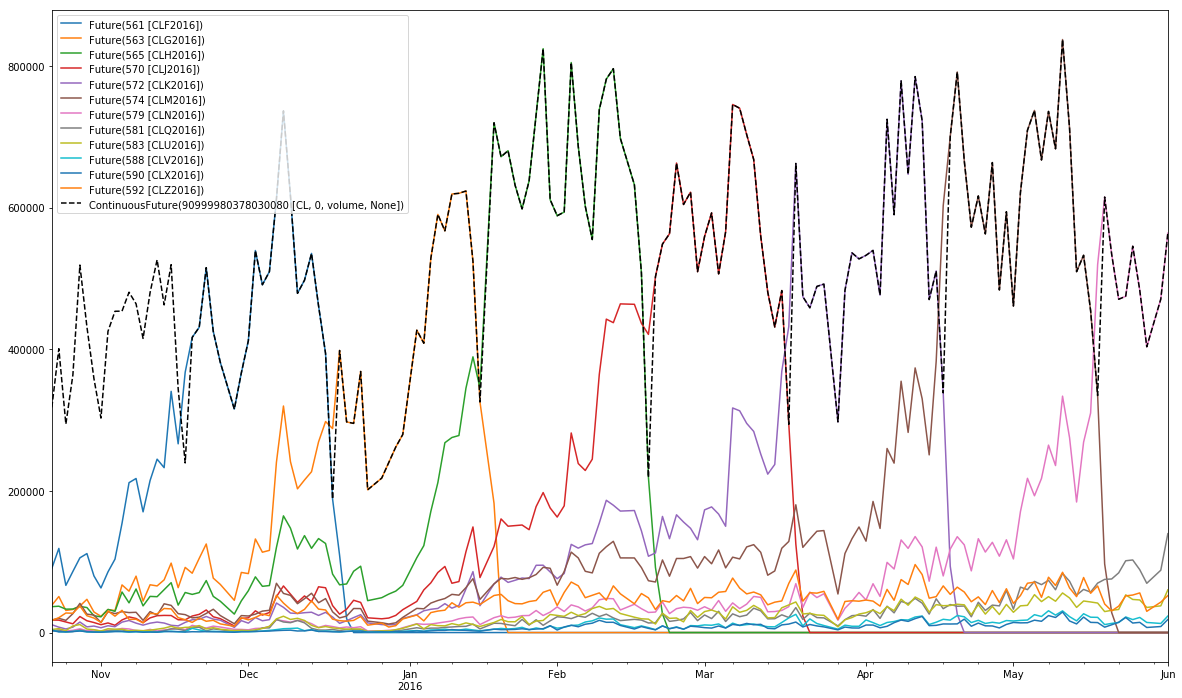

In [6]:
continuous_future = bundle_data.asset_finder.create_continuous_future
history = data.get_history_window
symbol = 'CL'

continuous_cl = continuous_future(symbol, offset=0, roll_style='volume', adjustment=None)

cl_contracts = [
    bundle_data.asset_finder.lookup_future_symbol(x) 
    for x
    in ['{}{}{}'.format(symbol, l, y) for l in 'FGHJKMNQUVXZ' for y in ['2016',]] #'2017'] ]
]

cl_contracts.append(continuous_cl)

start_dt = pd.Timestamp('2015-10-21', tz='UTC', offset='C')
end_dt = pd.Timestamp('2016-06-01', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
cl_consecutive_contract_volume = history(
    assets=cl_contracts,
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

cl_consecutive_contract_volume.plot(figsize=(20,12), style={continuous_cl: 'k--'});

In [5]:
cl_consecutive_contract_volume['2016-03-01':'2016-03-31']

,Future(557 [CLF2016]),Future(591 [CLF2017]),Future(559 [CLG2016]),Future(593 [CLG2017]),Future(561 [CLH2016]),Future(595 [CLH2017]),Future(565 [CLJ2016]),Future(599 [CLJ2017]),Future(567 [CLK2016]),Future(601 [CLK2017]),...,Future(609 [CLQ2017]),Future(577 [CLU2016]),Future(611 [CLU2017]),Future(582 [CLV2016]),Future(616 [CLV2017]),Future(584 [CLX2016]),Future(618 [CLX2017]),Future(586 [CLZ2016]),Future(620 [CLZ2017]),"ContinuousFuture(90999980378030080 [CL, 0, volume, None])"
2016-03-01 00:00:00+00:00,0.0,2634.0,0.0,2214.0,0.0,4248.0,559124.0,1168.0,173183.0,750.0,...,1427.0,29612.0,1601.0,10769.0,396.0,6923.0,645.0,49527.0,20046.0,559124.0
2016-03-02 00:00:00+00:00,0.0,2713.0,0.0,2139.0,0.0,3794.0,592382.0,918.0,177360.0,619.0,...,263.0,31802.0,404.0,10297.0,149.0,6313.0,88.0,49092.0,12934.0,592382.0
2016-03-03 00:00:00+00:00,0.0,3957.0,0.0,3256.0,0.0,8773.0,506313.0,1925.0,167236.0,1457.0,...,755.0,28302.0,2072.0,12158.0,302.0,9238.0,443.0,56907.0,15409.0,506313.0
2016-03-04 00:00:00+00:00,0.0,5330.0,0.0,3951.0,0.0,6020.0,565803.0,1587.0,150028.0,913.0,...,339.0,19112.0,899.0,6589.0,510.0,6395.0,324.0,57988.0,17948.0,565803.0
2016-03-07 00:00:00+00:00,0.0,5148.0,0.0,4536.0,0.0,7547.0,745455.0,3476.0,317049.0,1967.0,...,833.0,36360.0,3428.0,13273.0,1218.0,11481.0,604.0,76915.0,28495.0,745455.0
2016-03-08 00:00:00+00:00,0.0,3338.0,0.0,3098.0,0.0,4764.0,740152.0,3492.0,313021.0,2658.0,...,595.0,28604.0,1089.0,9937.0,156.0,10209.0,78.0,62712.0,17954.0,740152.0
2016-03-09 00:00:00+00:00,0.0,3609.0,0.0,2034.0,0.0,4312.0,702916.0,3655.0,295267.0,2561.0,...,392.0,31330.0,674.0,11230.0,565.0,12906.0,609.0,54573.0,13632.0,702916.0
2016-03-10 00:00:00+00:00,0.0,3122.0,0.0,1555.0,0.0,2851.0,667739.0,1119.0,283890.0,1063.0,...,255.0,38320.0,670.0,12055.0,249.0,10967.0,218.0,57169.0,14968.0,667739.0
2016-03-11 00:00:00+00:00,0.0,3092.0,0.0,1068.0,0.0,2319.0,559514.0,911.0,252007.0,797.0,...,212.0,32737.0,324.0,9751.0,215.0,11630.0,224.0,53248.0,13297.0,559514.0
2016-03-14 00:00:00+00:00,0.0,1903.0,0.0,1270.0,0.0,2731.0,480600.0,778.0,223631.0,497.0,...,380.0,20759.0,2140.0,8288.0,179.0,5971.0,179.0,39155.0,13212.0,480600.0


In [33]:
continuous_future?

In [7]:
mtf = continuous_future('MTF', offset=0, roll_style='volume', adjustment=None)

In [61]:
vol = history(
    assets=[mtf],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field= 'volume',
    data_frequency='daily'
)

sid = history(
    assets=[mtf],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field= 'sid',
    data_frequency='daily'
)

In [62]:
sid.columns =['sid']
sid['contract'] = sid['sid'].apply(lambda x: bundle_data.asset_finder.retrieve_asset(x))

In [63]:
vol

,"ContinuousFuture(93823526238158848 [MTF, 0, volume, None])"
2018-01-08 00:00:00+00:00,0.0
2018-01-09 00:00:00+00:00,2.0
2018-01-10 00:00:00+00:00,25.0
2018-01-11 00:00:00+00:00,6.0
2018-01-12 00:00:00+00:00,47.0
2018-01-16 00:00:00+00:00,0.0
2018-01-17 00:00:00+00:00,1.0
2018-01-18 00:00:00+00:00,135.0
2018-01-19 00:00:00+00:00,30.0
2018-01-22 00:00:00+00:00,0.0


In [64]:
sid

,sid,contract
2018-01-08 00:00:00+00:00,628,Future(628 [MTFF2018])
2018-01-09 00:00:00+00:00,628,Future(628 [MTFF2018])
2018-01-10 00:00:00+00:00,628,Future(628 [MTFF2018])
2018-01-11 00:00:00+00:00,628,Future(628 [MTFF2018])
2018-01-12 00:00:00+00:00,628,Future(628 [MTFF2018])
2018-01-16 00:00:00+00:00,628,Future(628 [MTFF2018])
2018-01-17 00:00:00+00:00,628,Future(628 [MTFF2018])
2018-01-18 00:00:00+00:00,630,Future(630 [MTFG2018])
2018-01-19 00:00:00+00:00,630,Future(630 [MTFG2018])
2018-01-22 00:00:00+00:00,630,Future(630 [MTFG2018])


In [48]:
cf = pd.DataFrame([vol, sid])

In [49]:
cf

,0
0,ContinuousFuture(93...
1,ContinuousFuture(93...


In [32]:
vol.iloc[:]

,"ContinuousFuture(93823526238158848 [MTF, 0, volume, None])"
2018-01-08 00:00:00+00:00,0.0
2018-01-09 00:00:00+00:00,2.0
2018-01-10 00:00:00+00:00,25.0
2018-01-11 00:00:00+00:00,6.0
2018-01-12 00:00:00+00:00,47.0
2018-01-16 00:00:00+00:00,0.0
2018-01-17 00:00:00+00:00,1.0
2018-01-18 00:00:00+00:00,135.0
2018-01-19 00:00:00+00:00,30.0
2018-01-22 00:00:00+00:00,0.0


In [22]:
cf

,"ContinuousFuture(93823526238158848 [MTF, 0, volume, None])"
2018-01-08 00:00:00+00:00,0.0
2018-01-09 00:00:00+00:00,2.0
2018-01-10 00:00:00+00:00,25.0
2018-01-11 00:00:00+00:00,6.0
2018-01-12 00:00:00+00:00,47.0
2018-01-16 00:00:00+00:00,0.0
2018-01-17 00:00:00+00:00,1.0
2018-01-18 00:00:00+00:00,135.0
2018-01-19 00:00:00+00:00,30.0
2018-01-22 00:00:00+00:00,0.0


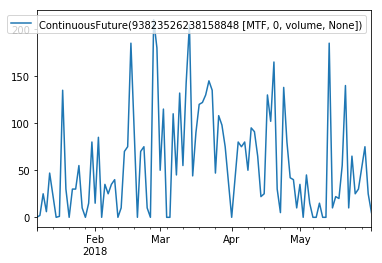

In [10]:
cf.plot();

In [6]:
continuous_cl

ContinuousFuture(93823526238158848, root_symbol='MTF', offset=0, roll_style='volume', adjustment=None)

In [4]:
volume = history(
    assets=cl_contracts,
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=30,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

In [5]:
volume[Future(581, 'CME')]

2018-04-19 00:00:00+00:00     135478.0
2018-04-20 00:00:00+00:00     121354.0
2018-04-23 00:00:00+00:00     213439.0
2018-04-24 00:00:00+00:00     149469.0
2018-04-25 00:00:00+00:00     162809.0
2018-04-26 00:00:00+00:00     155181.0
2018-04-27 00:00:00+00:00     110332.0
2018-04-30 00:00:00+00:00     186566.0
2018-05-01 00:00:00+00:00     164300.0
2018-05-02 00:00:00+00:00     227136.0
2018-05-03 00:00:00+00:00     164843.0
2018-05-04 00:00:00+00:00     158580.0
2018-05-07 00:00:00+00:00     227935.0
2018-05-08 00:00:00+00:00     300511.0
2018-05-09 00:00:00+00:00     255916.0
2018-05-10 00:00:00+00:00     222124.0
2018-05-11 00:00:00+00:00     213115.0
2018-05-14 00:00:00+00:00     238986.0
2018-05-15 00:00:00+00:00     345899.0
2018-05-16 00:00:00+00:00     320041.0
2018-05-17 00:00:00+00:00     455662.0
2018-05-18 00:00:00+00:00     459157.0
2018-05-21 00:00:00+00:00     575755.0
2018-05-22 00:00:00+00:00     718236.0
2018-05-23 00:00:00+00:00     700325.0
2018-05-24 00:00:00+00:00

In [6]:
continuous_future('CL', 0, 'volume', 'add')

ContinuousFuture(90999980378161152, root_symbol='CL', offset=0, roll_style='volume', adjustment='add')

In [7]:
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
dat = data.get_history_window(
    assets=[fut],
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='close',
    data_frequency='daily'
)

In [8]:
dat

,Future(0 [CLM1983])
2018-01-03 00:00:00+00:00,NaN
2018-01-04 00:00:00+00:00,NaN
2018-01-05 00:00:00+00:00,NaN
2018-01-08 00:00:00+00:00,NaN
2018-01-09 00:00:00+00:00,NaN
2018-01-10 00:00:00+00:00,NaN
2018-01-11 00:00:00+00:00,NaN
2018-01-12 00:00:00+00:00,NaN
2018-01-16 00:00:00+00:00,NaN
2018-01-17 00:00:00+00:00,NaN


In [9]:
clf17_sid = bundle_data.asset_finder.lookup_future_symbol('CLF2017').sid
start_dt = pd.Timestamp('2017-10-1', tz='UTC', offset='C')
cl = continuous_future('CL', offset=0, roll_style='calendar', adjustment='mul')
oc = bundle_data.asset_finder.get_ordered_contracts('CL')
chain = oc.active_chain(clf17_sid, start_dt.value)
all_chain = bundle_data.asset_finder.retrieve_all(chain)
all_chain

[Future(551 [CLF2017]),
 Future(552 [CLG2017]),
 Future(553 [CLH2017]),
 Future(556 [CLJ2017]),
 Future(557 [CLK2017]),
 Future(558 [CLM2017]),
 Future(561 [CLN2017]),
 Future(562 [CLQ2017]),
 Future(563 [CLU2017]),
 Future(566 [CLV2017]),
 Future(567 [CLX2017]),
 Future(568 [CLZ2017]),
 Future(571 [CLF2018]),
 Future(572 [CLG2018]),
 Future(573 [CLH2018]),
 Future(576 [CLJ2018]),
 Future(577 [CLK2018]),
 Future(578 [CLM2018]),
 Future(581 [CLN2018]),
 Future(582 [CLQ2018]),
 Future(583 [CLU2018]),
 Future(584 [CLV2018]),
 Future(587 [CLX2018]),
 Future(588 [CLZ2018]),
 Future(591 [CLF2019]),
 Future(592 [CLG2019]),
 Future(595 [CLH2019]),
 Future(596 [CLJ2019]),
 Future(597 [CLK2019]),
 Future(599 [CLM2019]),
 Future(601 [CLN2019]),
 Future(602 [CLQ2019]),
 Future(605 [CLU2019]),
 Future(606 [CLV2019]),
 Future(607 [CLX2019]),
 Future(610 [CLZ2019]),
 Future(611 [CLF2020]),
 Future(612 [CLG2020]),
 Future(613 [CLH2020]),
 Future(614 [CLJ2020]),
 Future(615 [CLK2020]),
 Future(616 [CLM

In [10]:
all_chain[1].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2017-01-18 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-01-20 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-01-20 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-01-18 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 552,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLG2017',
 'tick_size': 0.01}

In [24]:
cl = continuous_future('CL', offset=0, roll_style='volume', adjustment=None)

In [25]:
cl

ContinuousFuture(90999980378030080, root_symbol='CL', offset=0, roll_style='volume', adjustment=None)

In [13]:
oc = bundle_data.asset_finder.get_ordered_contracts('CL')
chain = oc.active_chain(clf17_sid, start_dt.value)
all_chain = bundle_data.asset_finder.retrieve_all(chain)
all_chain

[Future(551 [CLF2017]),
 Future(552 [CLG2017]),
 Future(553 [CLH2017]),
 Future(556 [CLJ2017]),
 Future(557 [CLK2017]),
 Future(558 [CLM2017]),
 Future(561 [CLN2017]),
 Future(562 [CLQ2017]),
 Future(563 [CLU2017]),
 Future(566 [CLV2017]),
 Future(567 [CLX2017]),
 Future(568 [CLZ2017]),
 Future(571 [CLF2018]),
 Future(572 [CLG2018]),
 Future(573 [CLH2018]),
 Future(576 [CLJ2018]),
 Future(577 [CLK2018]),
 Future(578 [CLM2018]),
 Future(581 [CLN2018]),
 Future(582 [CLQ2018]),
 Future(583 [CLU2018]),
 Future(584 [CLV2018]),
 Future(587 [CLX2018]),
 Future(588 [CLZ2018]),
 Future(591 [CLF2019]),
 Future(592 [CLG2019]),
 Future(595 [CLH2019]),
 Future(596 [CLJ2019]),
 Future(597 [CLK2019]),
 Future(599 [CLM2019]),
 Future(601 [CLN2019]),
 Future(602 [CLQ2019]),
 Future(605 [CLU2019]),
 Future(606 [CLV2019]),
 Future(607 [CLX2019]),
 Future(610 [CLZ2019]),
 Future(611 [CLF2020]),
 Future(612 [CLG2020]),
 Future(613 [CLH2020]),
 Future(614 [CLJ2020]),
 Future(615 [CLK2020]),
 Future(616 [CLM

In [14]:
all_chain[2].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2017-02-19 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-02-21 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-02-21 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-02-19 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 553,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLH2017',
 'tick_size': 0.01}

In [15]:
all_chain[3].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2017-03-19 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-03-21 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-03-21 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-03-19 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 556,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLJ2017',
 'tick_size': 0.01}

In [16]:
cf = history(
    assets=[cl],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field='sid',
    data_frequency='daily'
)

In [17]:
cf.columns=['contract']

In [18]:
contracts = cf['contract'].apply(lambda x: bundle_data.asset_finder.retrieve_asset(x))

In [19]:
contracts

2018-01-08 00:00:00+00:00    Future(572 [CLG2018])
2018-01-09 00:00:00+00:00    Future(572 [CLG2018])
2018-01-10 00:00:00+00:00    Future(572 [CLG2018])
2018-01-11 00:00:00+00:00    Future(572 [CLG2018])
2018-01-12 00:00:00+00:00    Future(572 [CLG2018])
2018-01-16 00:00:00+00:00    Future(572 [CLG2018])
2018-01-17 00:00:00+00:00    Future(572 [CLG2018])
2018-01-18 00:00:00+00:00    Future(572 [CLG2018])
2018-01-19 00:00:00+00:00    Future(573 [CLH2018])
2018-01-22 00:00:00+00:00    Future(573 [CLH2018])
2018-01-23 00:00:00+00:00    Future(573 [CLH2018])
2018-01-24 00:00:00+00:00    Future(573 [CLH2018])
2018-01-25 00:00:00+00:00    Future(573 [CLH2018])
2018-01-26 00:00:00+00:00    Future(573 [CLH2018])
2018-01-29 00:00:00+00:00    Future(573 [CLH2018])
2018-01-30 00:00:00+00:00    Future(573 [CLH2018])
2018-01-31 00:00:00+00:00    Future(573 [CLH2018])
2018-02-01 00:00:00+00:00    Future(573 [CLH2018])
2018-02-02 00:00:00+00:00    Future(573 [CLH2018])
2018-02-05 00:00:00+00:00    Fu

In [20]:
cf = history(
    assets=[cl],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

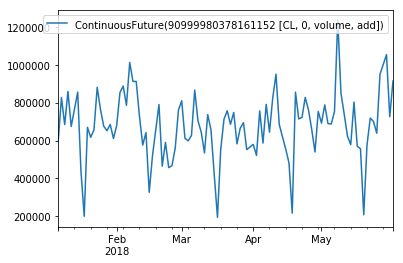

In [21]:
cf.plot()